<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## Importing Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


## Importing Data Sets


Load the csv:


In [116]:
%autosave 999999999999999

Autosaving every 999999999999999 seconds


In [117]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Documents\Data Analyst Course\Portofolio\KC_House_Data.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


### Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>


In [5]:
df.drop("id", axis = 1, inplace=True)
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


We can replace the missing values of the column <code>'bedrooms'</code> and <code>'bathrooms'</code> with the mean of the column using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [7]:
#Replacing missing value on bedrooms and bathrooms
mean_bed=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean_bed, inplace=True)

mean_bath=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean_bath, inplace=True)

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Module 3: Exploratory Data Analysis


<AxesSubplot:xlabel='price'>

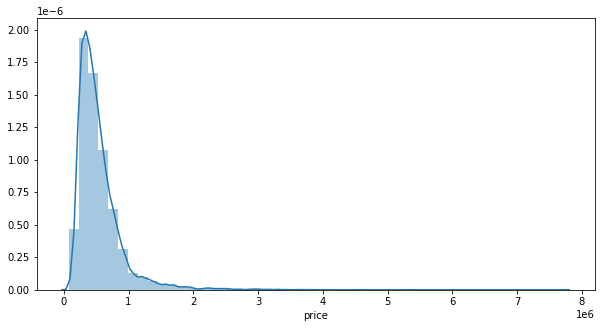

In [9]:
# checking the distribution of price
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

from the plot abouse can be seen that the house price in Kings County is centered in 0 USD to 2 million USD

### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [10]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

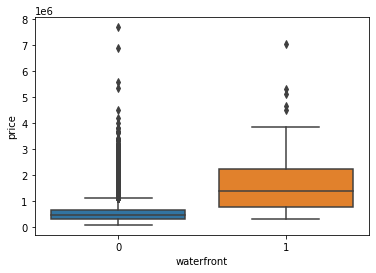

In [11]:
sns.boxplot(x="waterfront", y="price", data = df)

the dots above the Upper Bound means that it is an outliers. from the graph above we can see that a house with a waterfont view has more outlier than house without waterfont

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


(0.0, 8085308.367447229)

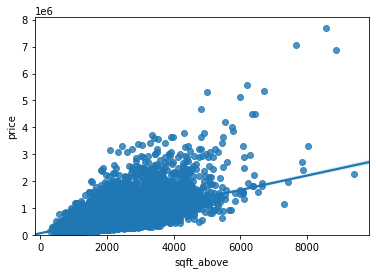

In [12]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

from the correlation showed above, can be inferred that *long* is one of the variable with the lowest correlation, and *sqft_living* with the highest correlation, then we can use this variabel to fit a linear regression

# Module 4: Model Development


###### variable with the lowest correlation vs highest correlation

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and <code>'sqft_living'</code>, then  caculate the R^2.
although *long* has very low correlation, but lets fit a linear regression to see the difference from a variable with low correlation and high correlation

(0.0, 8081250.0)

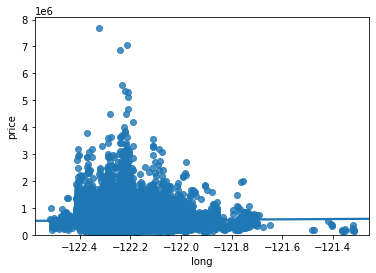

In [14]:
sns.regplot(x="long", y="price", data=df)
plt.ylim(0,)

In [15]:
#Fitting a linear regression using *long*
X = df[['long']]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X,Y)
lm1.score(X, Y)

0.00046769430149007363

From plot above, we can see that between *long* and *price*, there is no pattern formed and the R^2 is too low. So *long* is not a good feature to form a linear regression

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.

(0.0, 8093698.631083142)

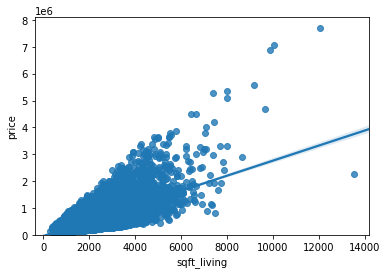

In [16]:
sns.regplot(x="sqft_living", y="price", data=df)
plt.ylim(0,)

In [17]:
X = df[['sqft_living']] 
Y = df['price']
lm2 = LinearRegression()
lm2.fit(X,Y)
lm2.score(X, Y)

0.4928532179037931

In [18]:
lm2.coef_

array([280.6235679])

From plot above, we can see that between *sqft_living* and *price*, there is linear pattern formed. So *sqft_living* is  a good feature to form a linear regression (better than *long*). The R^2 is higher too, which higher R^2 means a better model. From this we can conclude that a variable with higher correlation is a better feature to make a linear regression model.

### Multiple Linier Regression

In [61]:
features =["floors", "waterfront","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [62]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [63]:
predictionsLR = lm.predict(x_test)
predictionsLR[0:5]

array([736536.61492192, 388376.61492192, 949528.61492192, 646424.61492192,
       279832.61492192])

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lm_MAE = mean_absolute_error(y_test, predictionsLR)
lm_MSE = mean_squared_error(y_test, predictionsLR)
lm_R2 = r2_score(y_test, predictionsLR)

In [65]:
print("MAE: %.2f" % lm_MAE)
print("MSE: %.2f" % lm_MSE)
print("R2-score: %.2f" % lm_R2 )

MAE: 155064.27
MSE: 68948993644.14
R2-score: 0.60


### Linear Regression Optimisation with pipeline

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [66]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [67]:
pipe=Pipeline(Input)
features = x_train.astype(float)
pipe.fit(features, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [68]:
predictionspipe = pipe.predict(x_test)

In [69]:
pipe_MAE = mean_absolute_error(y_test, predictionspipe)
pipe_MSE = mean_squared_error(y_test, predictionspipe)
pipe_R2 = r2_score(y_test, predictionspipe)

In [70]:
print("MAE: %.2f" % pipe_MAE)
print("MSE: %.2f" % pipe_MSE)
print("R2-score: %.2f" % pipe_R2 )

MAE: 143093.31
MSE: 49683810503.17
R2-score: 0.71


###### But there is a question. Is a linear regression the best algorithms to use to predict the price?

#### Checking if there is Multicollinierity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [73]:
x = df[["floors", "waterfront","bedrooms" ,"sqft_basement" ,"view" ,
        "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [74]:
calc_VIF(x)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,floors,15.744246
1,waterfront,1.206054
2,bedrooms,18.486719
3,sqft_basement,inf
4,view,1.490273
5,bathrooms,24.810966
6,sqft_living15,26.153100
7,sqft_above,inf
8,grade,40.553843
9,sqft_living,inf


Many variables have VIF > 10, which means strong multicollinierity happens. So for this analysis, its better to use Ridge Regression than Linier Regression.

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [75]:
from sklearn.linear_model import Ridge

In [76]:
RidgeModel = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [77]:
# define grid
grid = dict()
grid['alpha'] = arange(0.01, 1, 0.01)

In [78]:
# define search
search = GridSearchCV(RidgeModel, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [79]:
# perform the search
results = search.fit(X, Y)

In [80]:
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -153756.638
Config: {'alpha': 0.01}


In [81]:
RidgeMod = Ridge(alpha=0.01)
RidgeMod.fit(x_train, y_train)
RidgeMod.score(x_train, y_train)

0.5938862826274461

In [84]:
ridgepredictions = RidgeMod.predict(x_test)

In [85]:
Ridge_MAE = mean_absolute_error(y_test, ridgepredictions)
Ridge_MSE = mean_squared_error(y_test, ridgepredictions)
Ridge_R2 = r2_score(y_test, ridgepredictions)

In [86]:
print("MAE: %.2f" % Ridge_MAE)
print("MSE: %.2f" % Ridge_MSE)
print("R2-score: %.2f" % Ridge_R2 )

MAE: 155114.35
MSE: 68991640943.75
R2-score: 0.60


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.99, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [101]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RigeModel=Ridge(alpha=0.01)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_train_pr, y_train)

0.6649620872728702

In [108]:
Ridge2predictions = RigeModel.predict(x_test_pr)

In [109]:
Ridge2predictions.shape

(4323,)

In [110]:
Ridge2_MAE = mean_absolute_error(y_test, Ridge2predictions)
Ridge2_MSE = mean_squared_error(y_test, Ridge2predictions)
Ridge2_R2 = r2_score(y_test, Ridge2predictions)

In [111]:
print("MAE: %.2f" % Ridge2_MAE)
print("MSE: %.2f" % Ridge2_MSE)
print("R2-score: %.2f" % Ridge2_R2 )

MAE: 142869.71
MSE: 49688738062.67
R2-score: 0.71


In [113]:
RigeModel.coef_

array([-1.70527812e+00,  8.24866360e+04, -5.01171937e+04, -3.05854178e+04,
       -1.33679117e+01, -1.00511499e+05, -5.34786324e+04,  2.73005133e+02,
       -1.20684537e+02, -3.16700292e+04, -1.38414543e+02,  1.19271184e+04,
       -1.77603047e+05,  1.59514265e+04,  7.29754430e+01,  1.82151177e+04,
       -6.23505003e+04, -9.74915055e+01, -3.13026961e+01,  1.48750122e+04,
        4.18114972e+01, -5.01027764e+04, -7.66795038e+03, -3.92188280e+01,
        3.83075109e+04,  1.48906457e+05,  2.26270951e+02,  1.54227173e+02,
       -9.44009530e+04,  1.09332869e+02,  1.08215043e+03, -1.26289224e+01,
        1.66733531e+03, -1.22993080e+03,  6.55763260e+00,  9.32311739e+00,
       -1.65320672e+03, -5.73695904e+00, -1.20177246e+00, -1.74738316e+00,
       -1.33536373e+01,  5.18283420e+00, -6.02116232e+00,  1.28374598e+01,
        2.68764312e+00,  1.80236678e+03,  9.35154262e+02,  2.45401253e+01,
       -1.19025996e+01,  1.27797934e+04, -1.44798712e+01,  2.39690361e+04,
       -1.78531075e+01,  

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2022-07-29        | 2.3     | Lakshmi Holla | Added library import |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
